# Data Science Salaries Analysis

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.float_format', str)

In [56]:

data_science_salary = pd.read_csv('raw_datasets/data_science_salaries_proj.csv')


display(data_science_salary.head(10))
display(data_science_salary.describe())

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
5,BI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium
6,Research Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium
7,Research Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium
9,Data Engineer,Executive-level,Full-time,Remote,2024,United States,136000,USD,136000,United States,Medium


,work_year,salary,salary_in_usd
count,6599.0,6599.0,6599.0
mean,2022.8184573420215,179283.25549325655,145560.55856948023
std,0.6748089100865061,526372.2423249817,70946.83806953009
min,2020.0,14000.0,15000.0
25%,2023.0,96000.0,95000.0
50%,2023.0,140000.0,138666.0
75%,2023.0,187500.0,185000.0
max,2024.0,30400000.0,750000.0


## Now let's look at the distribution of Jobs By Job title

Text(0.5, 0, 'Amount of Jobs')

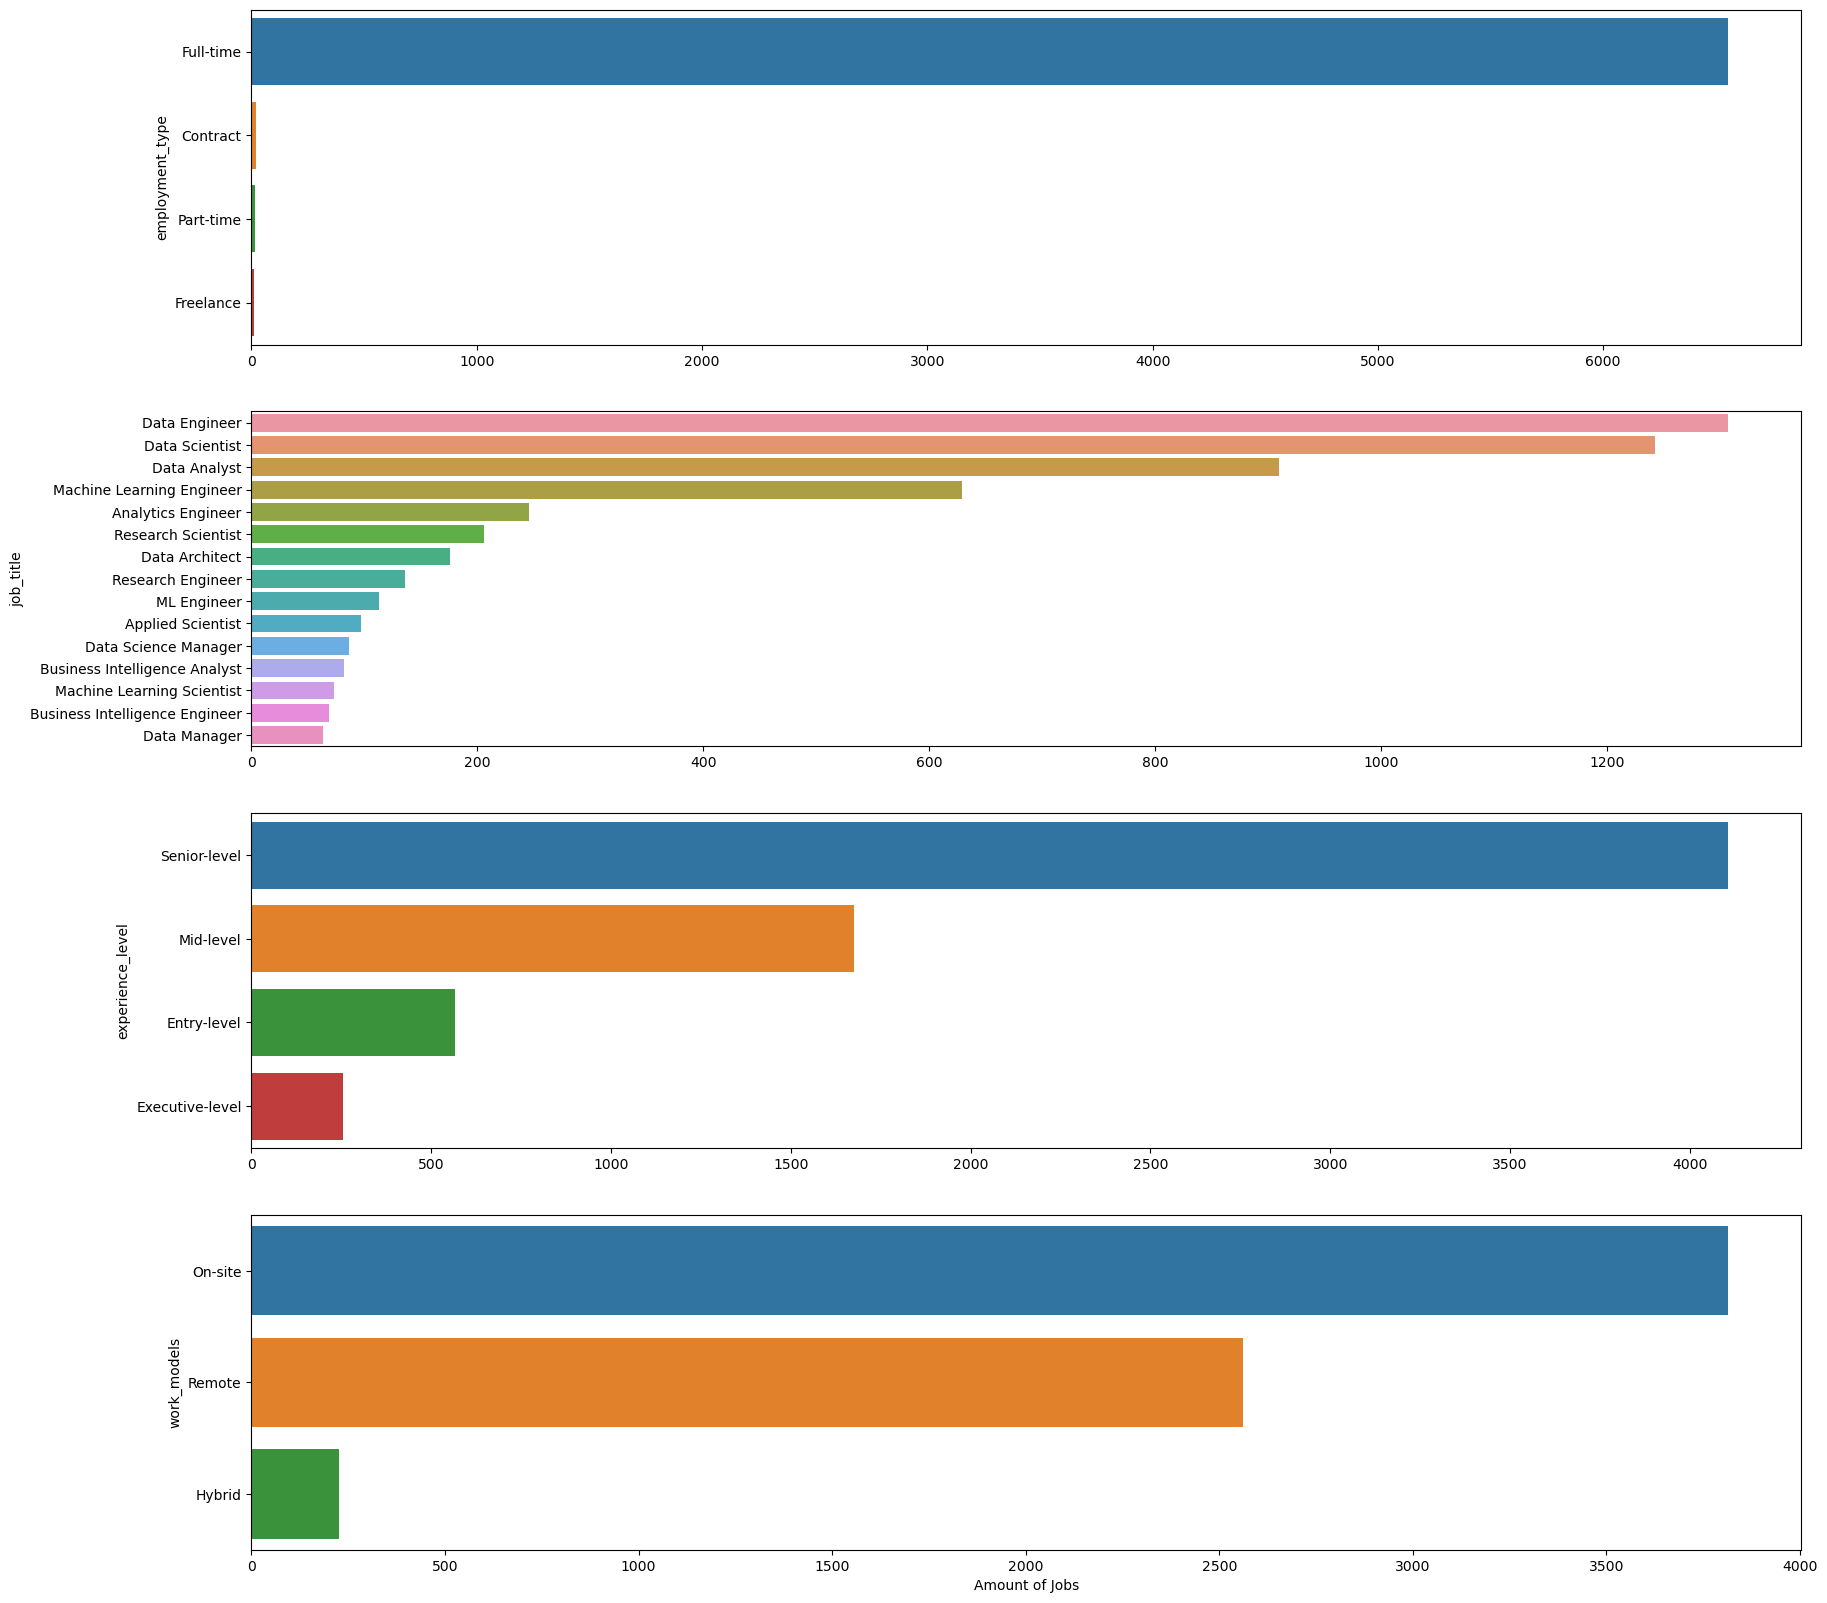

In [57]:
fig,ax = plt.subplots(4,1,figsize=(20,20))

columns_to_show = ['employment_type', 'job_title', 'experience_level', 'work_models']

iter_v = 0

for x in columns_to_show:
    job_counts = data_science_salary[x].value_counts()
    sns.barplot(x=job_counts[0:15].values, y=job_counts[0:15].index, ax=ax[iter_v], orient='h')
    iter_v+=1

    
plt.xlabel('Amount of Jobs')

    



Text(0.5, 0, 'Amount of Jobs')

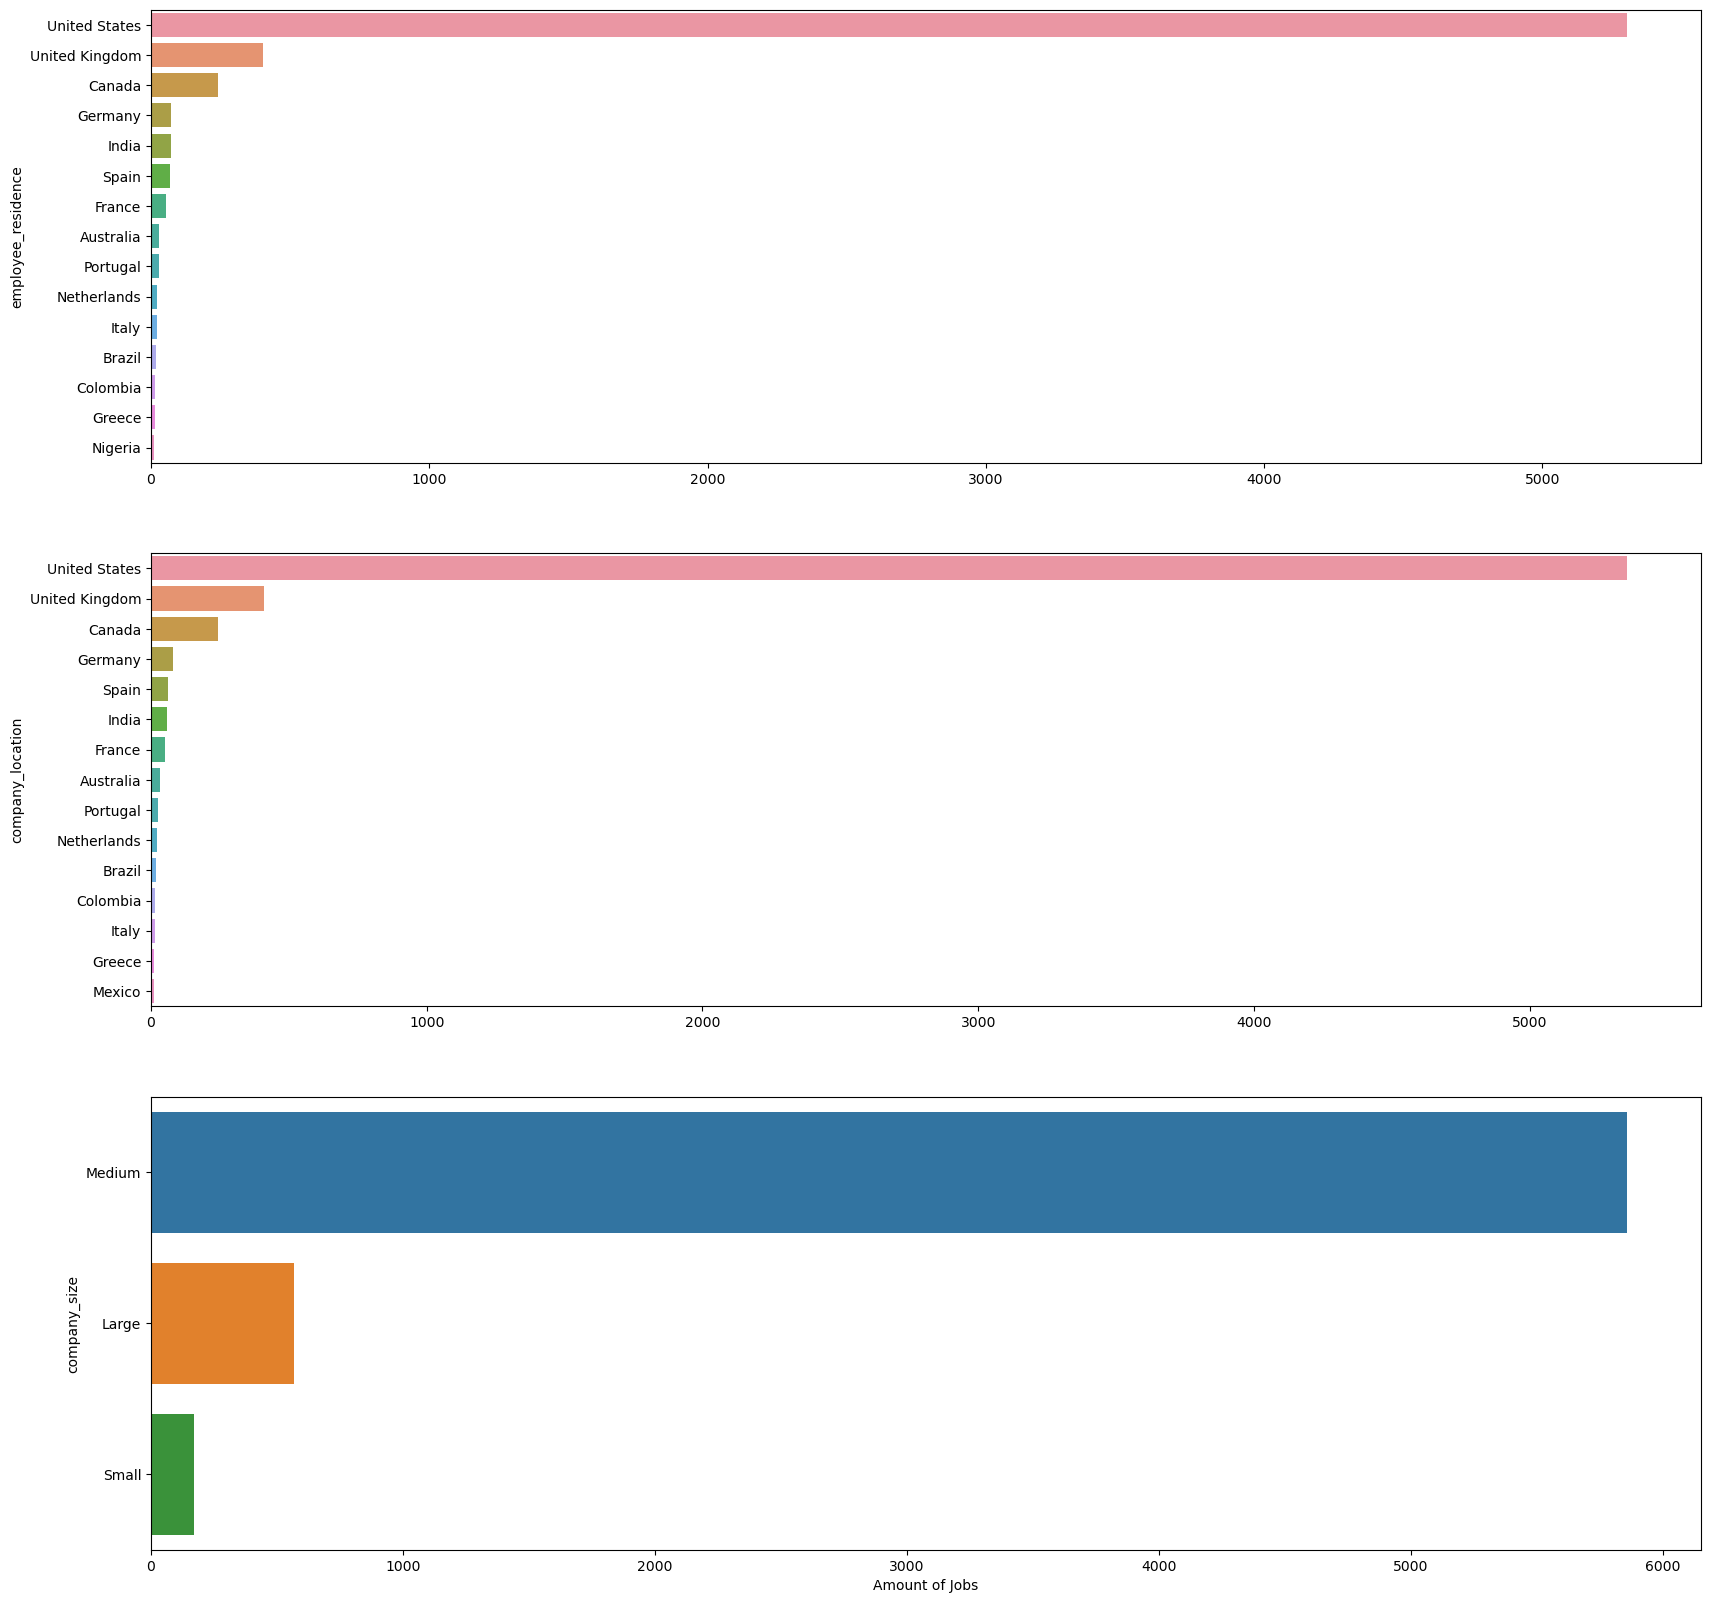

In [64]:
fig,ax = plt.subplots(3,1,figsize=(20,20))

columns_to_show = ['employee_residence', 'company_location', 'company_size' ]

iter_v = 0

for x in columns_to_show:
    job_counts = data_science_salary[x].value_counts()
    sns.barplot(x=job_counts[0:15].values, y=job_counts[0:15].index, ax=ax[iter_v])
    iter_v+=1

    
plt.xlabel('Amount of Jobs')




    


<Axes: ylabel='job_title'>

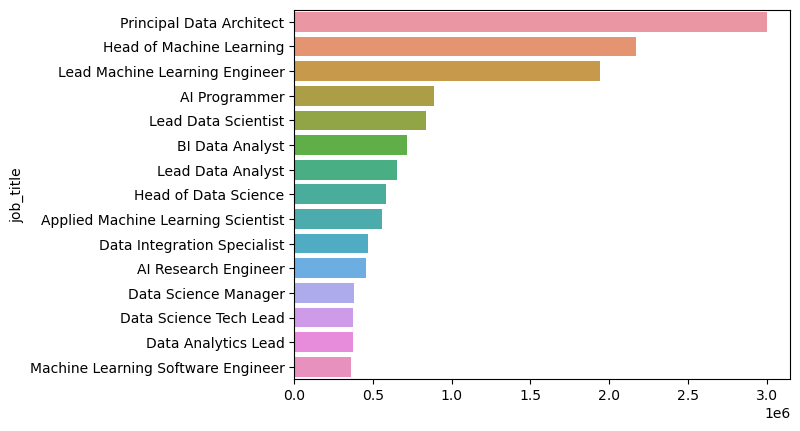

In [63]:


mean_of_salaries_ds = data_science_salary.groupby('job_title')['salary'].mean()

mean_salary_by_job_sorted = mean_of_salaries_ds.sort_values(ascending=False)


sns.barplot(x=mean_salary_by_job_sorted[0:15].values.round(2), y=mean_salary_by_job_sorted[0:15].index)